This examples show the features of the class LayeredFeatureMap that can be used for a simple
custom creation of new feature maps.

In [1]:
import numpy as np
from squlearn.feature_map.layered_feature_map import LayeredFeatureMap, Layer

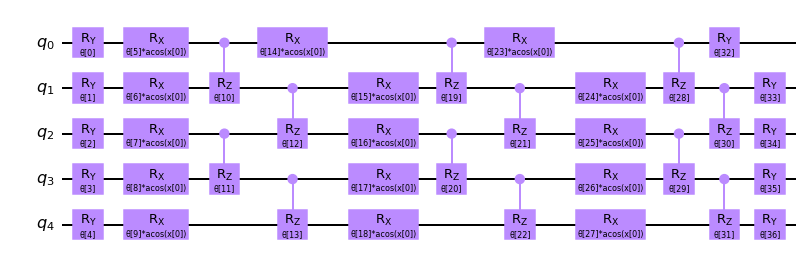

In [2]:
# Build a layered feature map from a string;
# default strings are "x" for input data and "p" for parameters.
# Layers can be added by N[...] where N is the number of repetitions.
# Custom encodings can be implemented by for example Rx(p,x;=p*np.arccos(x),{p,x}),
# in which the function following "=" is the encoding function based on the variables in the curly brackets.

lfm = LayeredFeatureMap.from_string(
    "Ry(p)-3[Rx(p,x;=p*np.arccos(x),{p,x})-crz(p)]-Ry(p)", num_qubits=5, num_features=1
)
lfm.draw()

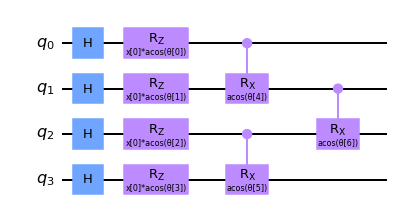

In [3]:
# Build a layered feature map from qiskit inspired commands
# Single qubit gates are applied to all qubits
# Two qubit gates are applied either in a all-to-all or a nearest neighbor arrangement
# Encoding maps can be specified by a custom python function

lfm2 = LayeredFeatureMap(4, 1)


def multiply_with_arccos(x, y):
    return x * np.arccos(y)


lfm2.H()
lfm2.Rz("x", "p", map=multiply_with_arccos)
lfm2.crx_entangling("p", map=np.arccos)
lfm2.draw()

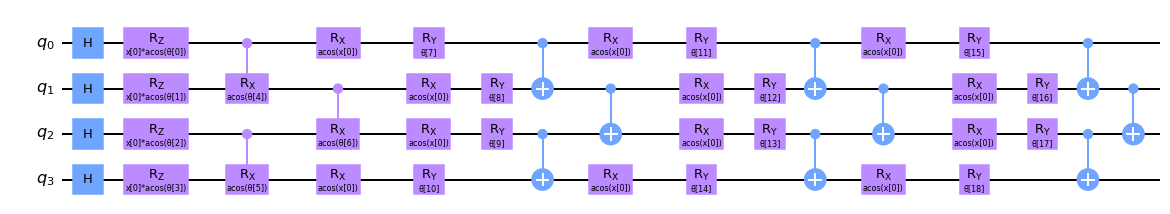

In [4]:
# Create a Layer that is repeated multiple times

# Creates the layer associated with feature map lfm2
layer = Layer(lfm2)
layer.Rx("x", map=np.arccos)
layer.Ry("p")
layer.cx_entangling()

# Add the layer to the feature map lfm2
lfm2.add_layer(layer, num_layers=3)
lfm2.draw()